<a href="https://colab.research.google.com/github/chavalvit-k/Forest-Clover-Classification-with-Deep-Learning/blob/main/Forest_Clover_Classification_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Clover Classification with Deep Learning

# Import Libraries

In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, InputLayer, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option("display.max_columns", None)

# Import Dataset

In [3]:
df = pd.read_csv("cover_data.csv")

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


# Explore Dataset

In [5]:
df.shape

(581012, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
continuous_columns = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                      "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
df[continuous_columns].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


# Select Features and Target

In [8]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [9]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
y.head()

,class
0,5
1,5
2,2
3,2
4,5


In [11]:
y.value_counts().sort_index()

,count
class,
1,211840
2,283301
3,35754
4,2747
5,9493
6,17367
7,20510


# Split Training Set, Validation Set, and Testing Set

In [12]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state = 42)

In [13]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5, stratify = y_val_test, random_state = 42)

# Preprocess Data

## Balance Training Set

In [14]:
y_train.value_counts().sort_index()

,count
class,
1,169472
2,226640
3,28603
4,2198
5,7594
6,13894
7,16408


<Axes: xlabel='class'>

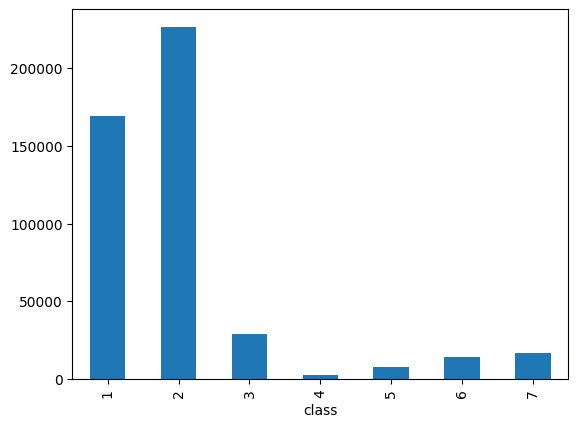

In [15]:
y_train.value_counts().sort_index().plot(kind = "bar")

In [16]:
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [17]:
y_train_resampled.value_counts().sort_index()

,count
class,
1,226640
2,226640
3,226640
4,226640
5,226640
6,226640
7,226640


<Axes: xlabel='class'>

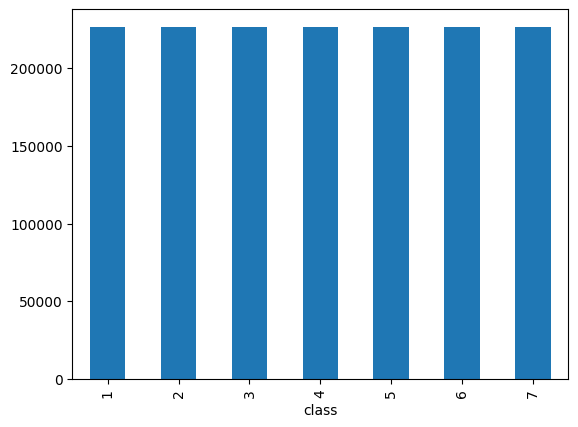

In [18]:
y_train_resampled.value_counts().sort_index().plot(kind = "bar")

## Scale Predictors

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Convert Validation Set and Testing Set into One-Hot Encoding Vector

In [20]:
y_train_resampled[0:50:10]

,class
0,2
10,2
20,1
30,2
40,1


In [21]:
y_train_resampled -= 1
y_val -= 1
y_test -= 1

In [22]:
y_train_resampled[0:50:10]

,class
0,1
10,1
20,0
30,1
40,0


In [23]:
y_train_resampled = to_categorical(y_train_resampled)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [24]:
y_train_resampled[0:50:10, :]

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]])

In [25]:
y_val[0:50:10, :]

array([[0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

In [26]:
y_test[0:50:10, :]

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

# Build Model

In [27]:
def build_model(features):

  model = Sequential([
      Input(shape = (features.shape[1], )),

      Dense(512, activation = "relu"),
      BatchNormalization(),

      Dense(256, activation = "relu"),
      BatchNormalization(),

      Dense(128, activation = "relu"),
      BatchNormalization(),

      Dense(64, activation = "relu"),
      BatchNormalization(),

      Dense(32, activation = "relu"),
      BatchNormalization(),

      Dense(7, activation = "softmax")
  ])

  model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

  model.summary()

  return model

In [28]:
model = build_model(X_train_scaled)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [29]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 5)

In [30]:
history = model.fit(X_train_scaled, y_train_resampled, epochs = 30, batch_size = 2048, validation_data = (X_val_scaled, y_val), callbacks = [early_stop], verbose = 1)

Epoch 1/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 60s 74ms/step - accuracy: 0.8111 - loss: 0.4944 - val_accuracy: 0.8374 - val_loss: 0.4028
Epoch 2/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 57s 74ms/step - accuracy: 0.9283 - loss: 0.1907 - val_accuracy: 0.8693 - val_loss: 0.3343
Epoch 3/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 57s 74ms/step - accuracy: 0.9451 - loss: 0.1467 - val_accuracy: 0.8880 - val_loss: 0.2755
Epoch 4/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 57s 74ms/step - accuracy: 0.9534 - loss: 0.1252 - val_accuracy: 0.8965 - val_loss: 0.2599
Epoch 5/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.9588 - loss: 0.1113 - val_accuracy: 0.9071 - val_loss: 0.2397
Epoch 6/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.9615 - loss: 0.1027 - val_accuracy: 0.9100 - val_loss: 0.2341
Epoch 7/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 56s 73ms/step - accuracy: 0.9645 - loss: 0.0953 - val_accuracy: 0.9095 - val_loss: 0.2322
Epoch 8/30
775/775 ━━━━━━━━━━━━━━━━━━━━ 82s 72ms/step - accuracy: 0.9666 - loss: 0.0903 - 

# Evaluate Model

In [31]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.871323,0.335679,0.837369,0.402807
1,0.933487,0.177280,0.869314,0.334285
2,0.947081,0.141351,0.888005,0.275533
3,0.954540,0.122279,0.896491,0.259857
4,0.959263,0.110079,0.907093,0.239676
5,0.962354,0.101551,0.910036,0.234079
6,0.964922,0.094460,0.909537,0.232193
7,0.966978,0.089254,0.917970,0.215795
8,0.968843,0.084411,0.924786,0.202383
9,0.970477,0.080044,0.920638,0.210824


<Axes: >

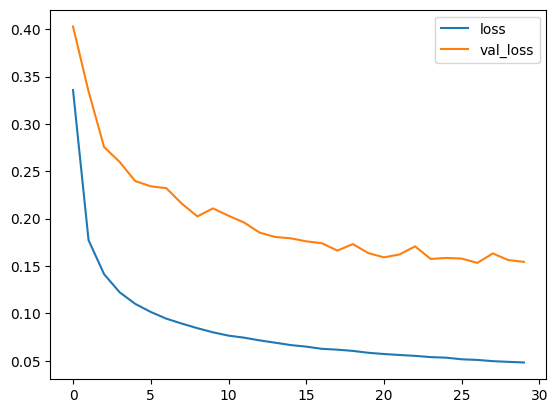

In [32]:
metrics[["loss", "val_loss"]].plot()

<Axes: >

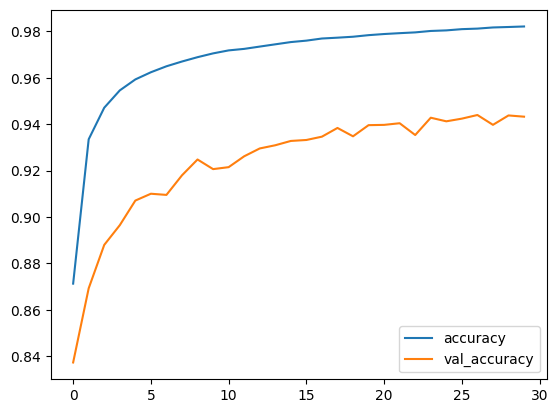

In [33]:
metrics[["accuracy", "val_accuracy"]].plot()

In [34]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 0)
print(f"Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}")

Test Loss: 0.16, Test Accuracy: 0.95


In [35]:
prediction = model.predict(X_test_scaled, verbose = 0)
predicted_class = np.argmax(prediction, axis = 1)
true_labels = np.argmax(y_test, axis = 1)

print(classification_report(true_labels, predicted_class))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     21184
           1       0.95      0.95      0.95     28331
           2       0.95      0.96      0.96      3576
           3       0.85      0.92      0.88       274
           4       0.79      0.96      0.87       949
           5       0.93      0.93      0.93      1737
           6       0.91      0.98      0.94      2051

    accuracy                           0.95     58102
   macro avg       0.90      0.95      0.92     58102
weighted avg       0.95      0.95      0.95     58102



# Predict on Samples of Testing Set

In [52]:
sample_classes = list(range(7)) * 3
correct = 0

print("Predict on 21 samples of testing set (each class has 3 samples)")

for pred, true_label in zip(predicted_class, true_labels):
  if true_label in sample_classes:
    sample_classes.remove(true_label)
    if pred == true_label:
      correct += 1
      print(f"Actual: {true_label} | Predict: {pred} | [CORRECT]")
    else:
      print(f"Actual: {true_label} | Predict: {pred} | [WRONG]")

print(f"Accuracy: {correct / 21 * 100:.2f} %")

Predict on 21 samples of testing set (each class has 3 samples)
Actual: 0 | Predict: 0 | [CORRECT]
Actual: 1 | Predict: 1 | [CORRECT]
Actual: 1 | Predict: 1 | [CORRECT]
Actual: 1 | Predict: 1 | [CORRECT]
Actual: 5 | Predict: 5 | [CORRECT]
Actual: 0 | Predict: 0 | [CORRECT]
Actual: 3 | Predict: 3 | [CORRECT]
Actual: 0 | Predict: 0 | [CORRECT]
Actual: 2 | Predict: 2 | [CORRECT]
Actual: 2 | Predict: 2 | [CORRECT]
Actual: 2 | Predict: 2 | [CORRECT]
Actual: 6 | Predict: 6 | [CORRECT]
Actual: 5 | Predict: 5 | [CORRECT]
Actual: 4 | Predict: 1 | [WRONG]
Actual: 6 | Predict: 6 | [CORRECT]
Actual: 4 | Predict: 4 | [CORRECT]
Actual: 5 | Predict: 1 | [WRONG]
Actual: 6 | Predict: 6 | [CORRECT]
Actual: 4 | Predict: 4 | [CORRECT]
Actual: 3 | Predict: 3 | [CORRECT]
Actual: 3 | Predict: 3 | [CORRECT]
Accuracy: 90.48 %
